In [1]:
import pandas as pd
import numpy as np
import csv
import pymorphy2

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from string import punctuation

import matplotlib.pyplot as plt
from matplotlib import pylab

from collections import Counter

from nltk import pos_tag

In [3]:
from nltk.stem.snowball import RussianStemmer
stemmer = RussianStemmer(False)
#stemmer.stem(w) 

In [4]:
stop = stopwords.words('russian')
pymorph = pymorphy2.MorphAnalyzer()

def lemm(words):
    words = nltk.word_tokenize(words)
    filtered_sentence = ''
    for w in words:
        if w not in stop:
            filtered_sentence = filtered_sentence + ' ' + pymorph.parse(w)[0].normal_form
    return filtered_sentence

In [2]:
def preproces(data):
    data.dropna(subset=['text'], inplace=True) 
    data.reset_index(inplace=True, drop=True) 
    data['tokens'] = data['text'].str.replace(r"[^\w]", " ") 
    data['tokens'] = data['tokens'].str.replace(r"[\d]", " ")
    data['tokens'] = data['tokens'].str.lower()
    data['tokens'] = data['tokens'].apply(lemm)
    df = pd.DataFrame()
    df['tokens'] = data['tokens'].values
    df['name'] = data['name'].values
    df['text'] = data['text'].values
    df['author'] = data['author'].values
    df['cat'] = data['categories'].values
    df['url'] = data['link'].values
    df.dropna(subset=['tokens'], inplace=True)
    df.drop_duplicates(subset=['tokens'], inplace = True)    
    df.dropna(subset=['tokens'], inplace=True) 
    #df = df.query('tokens != "---"')
    return df

In [42]:
data = pd.read_csv('books_3155.csv', encoding = 'utf8')
data.head()

,name,text,author,categories,link
0,Важные годы. Почему не стоит откладывать жизнь...,"Эта книга о десятилетии, определяющем судьбу ч...",Мэг Джей,"Саморазвитие, личностный рост;Личная эффективн...",https://mybook.ru/author/meg-dzhej/vazhnye-god...
1,Цветы для Элджернона,Сорок лет назад это считалось фантастикой.Соро...,Дэниел Киз,Научная фантастика;Зарубежная фантастика;экран...,https://mybook.ru/author/deniel-kiz/cvety-dlya...
2,Подсознание может всё!,"Использование огромных резервов, скрытых в под...",Джон Кехо,"Эзотерика, оккультизм;Практическая эзотерика;т...",https://mybook.ru/author/dzhon-keho/podsoznani...
3,Sapiens. Краткая история человечества,Сто тысяч лет назад Homo sapiens был одним из ...,Юваль Ной Харари,Зарубежная образовательная литература;Научно-п...,https://mybook.ru/author/yuval-harari/sapiens-...
4,Выбор. О свободе и внутренней силе человека,Эдит Ева Эгер в юном возрасте была отправлена ...,Эдит Ева Эгер,Биографии и мемуары;Зарубежная публицистика;си...,https://mybook.ru/author/edit-eva-eger/vybor-33/


In [24]:
data.describe()

,name,text,author,categories,link
count,31550,31192,31550,31384,31550
unique,25032,25215,9125,20575,25714
top,Стихотворения,Вниманию читателя предлагается сборник анекдот...,Неустановленный автор,Современные детективы;,https://mybook.ru/author/vadim-panov/vojny-nac...
freq,15,17,588,182,4


In [43]:
df = preproces(data)
df.describe()

C:\Users\meli-\AppData\Local\Temp/ipykernel_23224/2760454791.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tokens'] = data['text'].str.replace(r"[^\w]", " ") #убираем все знаки препинания, кроме слов
C:\Users\meli-\AppData\Local\Temp/ipykernel_23224/2760454791.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tokens'] = data['tokens'].str.replace(r"[\d]", " ") #убираем цифры


,tokens,name,text,author,cat,url
count,25152,25152,25152,25152,25028,25152
unique,25152,24506,25152,9103,20403,25152
top,эт книг десятилет определя судьб человек инве...,Возвращение,"Эта книга о десятилетии, определяющем судьбу ч...",Неустановленный автор,Современные детективы;,https://mybook.ru/author/meg-dzhej/vazhnye-god...
freq,1,13,1,480,130,1


In [44]:
df.to_csv('dataset.csv', index=False)

# Анализ данных

In [5]:
data = pd.read_csv('dataset.csv', encoding = 'utf8')
data.head()

,tokens,name,text,author,cat,url
0,этот книга десятилетие определять судьба чело...,Важные годы. Почему не стоит откладывать жизнь...,"Эта книга о десятилетии, определяющем судьбу ч...",Мэг Джей,"Саморазвитие, личностный рост;Личная эффективн...",https://mybook.ru/author/meg-dzhej/vazhnye-god...
1,сорок год назад это считаться фантастика соро...,Цветы для Элджернона,Сорок лет назад это считалось фантастикой.Соро...,Дэниел Киз,Научная фантастика;Зарубежная фантастика;экран...,https://mybook.ru/author/deniel-kiz/cvety-dlya...
2,использование огромный резерв скрытый подсозн...,Подсознание может всё!,"Использование огромных резервов, скрытых в под...",Джон Кехо,"Эзотерика, оккультизм;Практическая эзотерика;т...",https://mybook.ru/author/dzhon-keho/podsoznani...
3,сто тысяча год назад homo sapiens один миниму...,Sapiens. Краткая история человечества,Сто тысяч лет назад Homo sapiens был одним из ...,Юваль Ной Харари,Зарубежная образовательная литература;Научно-п...,https://mybook.ru/author/yuval-harari/sapiens-...
4,эдита ева эгер юный возраст отправить вместе ...,Выбор. О свободе и внутренней силе человека,Эдит Ева Эгер в юном возрасте была отправлена ...,Эдит Ева Эгер,Биографии и мемуары;Зарубежная публицистика;си...,https://mybook.ru/author/edit-eva-eger/vybor-33/


### Зависимость количества от длины

In [7]:
all_words = [word for tokens in data["tokens"].str.split() for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"].str.split()]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))
print("Mean sentence length is %s" % (sum(sentence_lengths)/len(sentence_lengths)))

1599160 words total, with a vocabulary size of 66804
Max sentence length is 375
Mean sentence length is 63.89994405817949


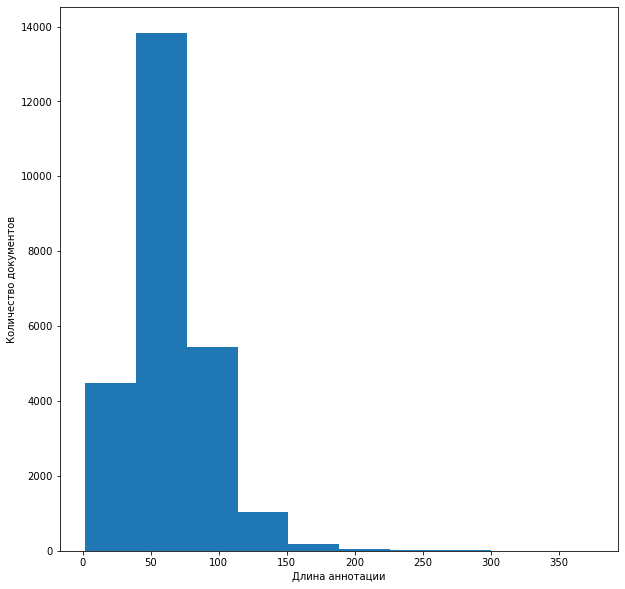

In [8]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Длина аннотации')
plt.ylabel('Количество документов')
plt.hist(sentence_lengths)
plt.show()

In [36]:
sorted(sentence_lengths)[25125]

247

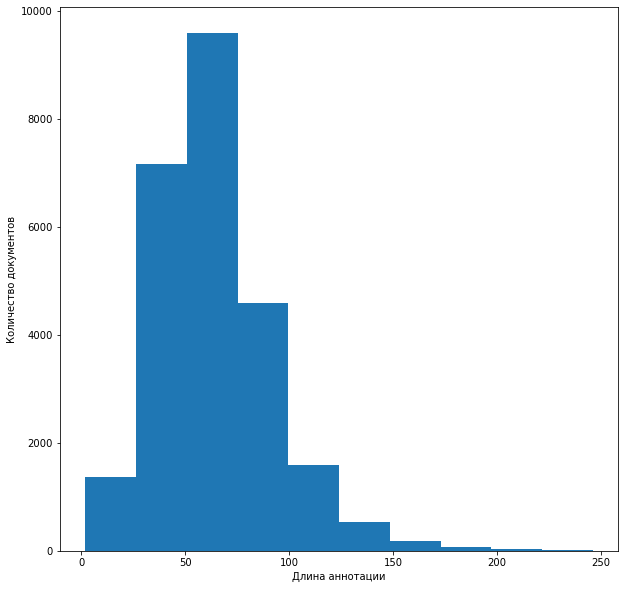

In [35]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Длина аннотации')
plt.ylabel('Количество документов')
plt.hist(sorted(sentence_lengths)[0:25125])
plt.show()

### Пос-тегирование

In [206]:
all_tags = np.array([])
for pt in pos_tag(VOCAB, lang='rus'):
    all_tags = np.append(all_tags, pt[1])

In [220]:
tags = Counter(all_tags).most_common(15)

In [221]:
df = pd.DataFrame.from_dict(tags)
df.columns = ['Часть речи','Количество']
df

,Часть речи,Количество
0,S,38518
1,V,12471
2,A=m,10179
3,NONLEX,2757
4,ADV,1780
5,A=f,571
6,A=n,90
7,PR,62
8,A=pl,60
9,A=sg,34


<AxesSubplot:xlabel='Часть речи'>

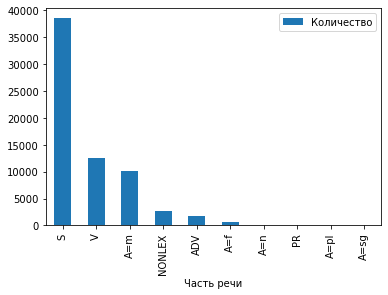

In [219]:
df.plot.bar(x=0, rot=90)

### Самые частые категории

In [132]:
data.dropna(subset=['cat'], inplace=True)

In [133]:
cats = Counter(" ".join(data["cat"]).split(';')).most_common(10)

In [136]:
df = pd.DataFrame.from_dict(cats)
df.columns = ['Жанр/тема','Количество книг']
df

,Жанр/тема,Количество книг
0,становление героя,1676
1,Современные детективы,1533
2,Героическое фэнтези,1485
3,магические миры,1327
4,Попаданцы,1181
5,"Саморазвитие, личностный рост",1134
6,Боевая фантастика,1112
7,опасные приключения,1047
8,Любовное фэнтези,980
9,сверхспособности,971


<AxesSubplot:xlabel='Жанр/тема'>

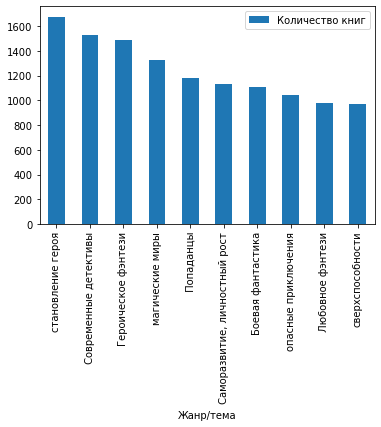

In [139]:
df.plot.bar(x=0, rot=90)

### Самые частые авторы

In [234]:
authors = Counter(data["author"]).most_common(12)

In [235]:
authors

[('Неустановленный автор', 480),
 ('Дарья Донцова', 228),
 ('Наталья Александрова', 220),
 ('Коллектив авторов', 165),
 ('Чингиз Абдуллаев', 142),
 ('Марина Серова', 132),
 ('Стивен Кинг', 127),
 ('Анна и Сергей Литвиновы', 110),
 ('Дарья Калинина', 106),
 ('Том Батлер-Боудон', 100),
 ('Сергей Лукьяненко', 95),
 ('Дина Рубина', 95)]

In [237]:
df = pd.DataFrame.from_dict(authors)
df.columns = ['Автор','Количество книг']
df

,Автор,Количество книг
0,Неустановленный автор,480
1,Дарья Донцова,228
2,Наталья Александрова,220
3,Коллектив авторов,165
4,Чингиз Абдуллаев,142
5,Марина Серова,132
6,Стивен Кинг,127
7,Анна и Сергей Литвиновы,110
8,Дарья Калинина,106
9,Том Батлер-Боудон,100


<AxesSubplot:xlabel='Автор'>

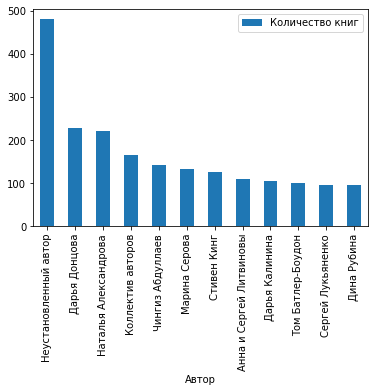

In [238]:
df.plot.bar(x=0, rot=90)

### Самые частые слова

In [226]:
data.dropna(subset=['tokens'], inplace=True)
common_words = Counter(" ".join(data["tokens"]).split()).most_common(10)

In [227]:
df = pd.DataFrame.from_dict(common_words)
df.columns = ['Слово','Количество упоминаний в коллекции']

In [228]:
df

,Слово,Количество упоминаний в коллекции
0,и,105532
1,в,75687
2,не,32012
3,на,31574
4,с,26244
5,он,24460
6,что,21535
7,она,18213
8,книга,17014
9,который,15916


<AxesSubplot:xlabel='Слово'>

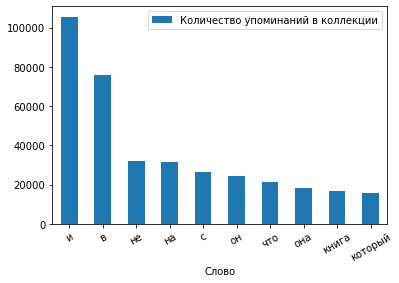

In [229]:
df.plot.bar(x=0, rot=30)

### Самые частые биграммы

In [157]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words, n_gram)).most_common(10))
n_gram_dic

{('этот', 'книга'): 1972,
 ('сохранный', 'издательский'): 835,
 ('издательский', 'макет'): 777,
 ('человек', 'который'): 714,
 ('сам', 'дело'): 671,
 ('друг', 'друг'): 649,
 ('один', 'самый'): 611,
 ('широкий', 'круг'): 588,
 ('весь', 'мир'): 555,
 ('русский', 'язык'): 554}

In [165]:
df = pd.DataFrame.from_dict(n_gram_dic, orient='index')
df.columns = ['Количество упоминаний в коллекции']

<AxesSubplot:>

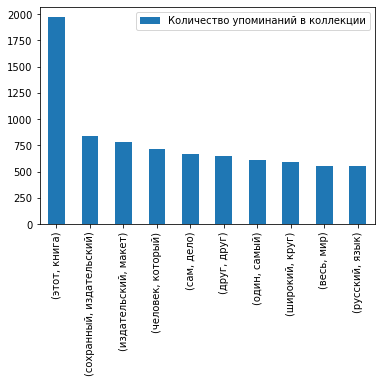

In [166]:
df.plot.bar(y=0, rot=90)

### Закон Ципфа

In [40]:
s = all_words
di = {}
for word in s:
    if word in di.keys():
        di[word] += 1
    else:
        di[word] = 1
key = max(di, key=di.get)
print(key, di[key])
list_d = list(di.items())
list_d.sort(key=lambda i: -i[1])

книга 17014


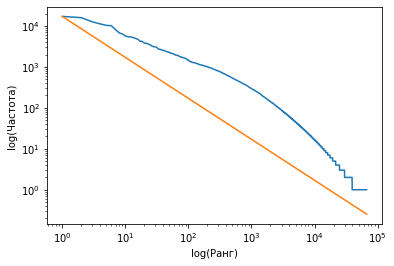

In [41]:
n = len(list_d)
ranks = range(1, n+1)
freqs = [freq for (word, freq) in list_d] 
freqs1 = [freqs[0]/r for r in ranks]
pylab.loglog(ranks, freqs)
pylab.loglog(ranks, freqs1)
pylab.xlabel('log(Ранг)')
pylab.ylabel('log(Частота)')
pylab.show()

In [42]:
rrr = [freqs[0]/i for i in range(1, n+1)]

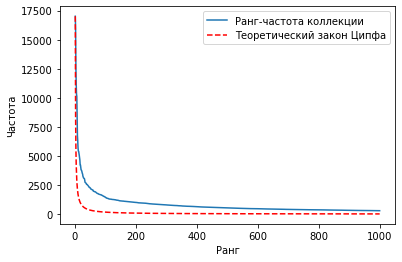

In [43]:
pylab.plot(ranks[0:1000], freqs[0:1000]) #this plots frequency, not relative frequency , label='alice'
pylab.plot(ranks[0:1000], rrr[0:1000], color = 'r', linestyle='dashed')
#pylab.plot([1,freqs[0]],[freqs[0],1],color='r')
pylab.xlabel('Ранг')
pylab.ylabel('Частота')
pylab.legend ( ("Ранг-частота коллекции", "Теоретический закон Ципфа") )
pylab.show()

### Закон Хипса

In [10]:
all_words = [word for tokens in data["tokens"].str.split() for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"].str.split()]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1599160 words total, with a vocabulary size of 66804
Max sentence length is 375


In [11]:
voc = set()
doc_num = []
num_words = []
ss = 0
for st in data['tokens']:
    for s in st.split():
        voc.add(s)
    ss = ss + len(st.split())
    doc_num.append(ss)
    num_words.append(len(voc))

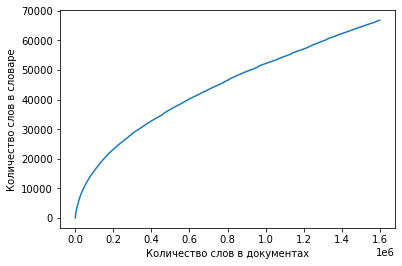

In [12]:
pylab.plot(doc_num, num_words)
pylab.xlabel('Количество слов в документах')
pylab.ylabel('Количество слов в словаре')
pylab.show()